# Losses and Finesse

The treatment follows closely the design approach by vanDam2018. 

Effective (round-trip) mirror losses are given by $ \mathcal{L}_\text{M,eff} =\frac{E_\text{max,a}^2}{n_\text{d}E_\text{max,d}^2}\mathcal{L}_\text{M,a}+\mathcal{L}_\text{M,d}$ where the scaling factor is $n_\text{d}=2.4$ for air-like modes, $1/n_\text{d}=0.417$ for diamond-like modes and 1 in case of AR-coating. The type of mode is solely determined by the thickness of the diamond membrane. 

The mirror losses due to surface roughness can be calculated by $\mathcal{S} \approx (\frac{4 \pi \sigma_{sc}}{\lambda})^2$ with the surface roughness RMS $\sigma_{sc}$ and the resonant wavelength $\lambda$. The absorption losses are $\mathcal{A}\approx 10~\text{ppm}$ and transmission losses are $\mathcal{T}\approx 50~\text{ppm}$ for a high-quality coating by LASER-OPTIK (Bogdanovic2017).  
As-bought fused-silica substrates show initially a roughness of $\sigma_{sc}=1.5~\text{nm RMS}$, which decreases after FIB-milling to $\sigma_{sc}=0.7~\text{nm RMS}$ (Trichet2015). Assuming the lower surface-roughness for both sides yields $\mathcal{L}_\text{M,a}=\mathcal{L}_\text{M,d}=\mathcal{T}+\mathcal{A}+\mathcal{S} \approx 260~\text{ppm}$ for SnV at 620 nm and $\mathcal{L}_\text{M,a}=\mathcal{L}_\text{M,d} \approx 200~\text{ppm}$ for SiV at 737 nm. 

    To be verified: surface roughness of planar mirror


In the following, a high-refractive index termination with $\text{Ta}_2\text{O}_5$ is assumed so that there is a node at the surface. This increases the effective cavity length but leads to no sensitivity to surface roughness at the diamond-DBR interface. 
The contribution to losses by the diamond membrane is then solely given by the surface roughness at the air-diamond interface with $\mathcal{S_\text{D,A}} \approx (\frac{4 \pi \sigma_{D,A}}{\lambda})^2$ yielding $\text{410 ppm}~ \sigma_\text{DA}^2$ [nm] for SnV and $\text{290 ppm}~ \sigma_\text{DA}^2$ [nm] for SiV. The interface is encountered twice during a round-trip and the contribution is given by $\mathcal{L}_\text{S,eff} \approx 2.78 (\frac{4 \pi \sigma_{DA}}{\lambda})^2$ for diamond-like mode (anti-node at the surface) and AR-coated diamond, but $\mathcal{L}_\text{S,eff} \approx 0$ (node at the surface). 

The condition that the diamond-like mode has less losses than the air-like mode can be written as $2.78 \cdot (\frac{4 \pi \sigma_{DA}}{\lambda})^2 < 1.98 \cdot \mathcal{L}_\text{M,a}$. This yields an upper-bound of $\sigma_{DA}{\lambda})$ = 0.67 nm RMS for SnV and $\sigma_{DA}{\lambda})$ = 0.8 nm RMS for SiV. Typical values for the AFM-measured surface roughness of thin diamond-membranes are 0.4 nm RMS (Ruf2020), 0.25 nm RMS (ChildressOSATalk) or 0.5 nm RMS (Heupel2020). However, the losses are typical higher than inferred from the measured surface roughness due to surface absorption and contamination (equivalent to $\sigma_{DA}$ being 2-3 times higher). 
Note that mirror losses are here the lowest-possible value. Increasing the mirror transmission deliberately (for higher collection efficiency) make diamond-modes generally more feasible. 

The finesse is given by $\mathcal{F}=2 \pi / \mathcal{L}_\text{eff}$ with the total losses $\mathcal{L}_\text{eff}=\mathcal{L}_\text{M,eff}+\mathcal{L}_\text{S,eff}$. Taking a state-of-the-art surface roughness of the diamond-membrane $\sigma_\text{DA}^2 = 0.65~\text{nm}$ (accounting also for absorption & surface contamination, ChildressOSATalk) yields $\mathcal{L}_\text{eff}= 850~\text{ppm}$ for SnV and $\mathcal{L}_\text{eff}= 625~\text{ppm}$ for SiV. (diamond-like mode).

The calculated finess is $\mathcal{F} \approx 7400$ for SnV and $\mathcal{F} \approx 10000$ for SiV, leaving plenty of room to introduce additional transmission.  



# Ideal Cooperativity

The "geometrical" cooperativity  can be written as $C=\frac{4g^2}{\kappa \gamma_0}\equiv F_\text{P}$ which gives the Purcell-enhancement of the relevant transition $\gamma_0$ (Janitz2020, ChildressOSATalk) (Note that this definition does not take quantum efficiency, Debye-Waller factor and dephasing into account, see discussion later). 
Equivalently, it can be rewritten as $F_\text{P}=\frac{3}{\pi^2}\frac{\lambda_0^2}{w_0^2}\mathcal{F}$ with the resonant wavelength $\lambda_0$ and the beam-waist $w_0$. It follows that a smaller beam-area increases the cooperativity. 

The size of the beam-waist (in the diamond) as a function of air-gap $t_A$ , diamond-thickness $t_D$ and radius of curvature $\text{RoC}$ is given by: 
$w_\text{0,d}= \sqrt{\frac{\lambda_0}{\pi}}\left(\left( t_a + \frac{t_d}{n_d}\right) \left(\text{RoC}-\left(t_a+\frac{t_d}{n_d}\right)\right)\right)^{1/4}$. Because of the scaling-factor $n_D$, decreasing the air-gap has a larger effect. In the following $t_d$ is fixed to a reasonable thickness of 4 µm. 
The effective lenght of the cavity is in reality larger due to the finite penetration depth (~800 nm (Dolan2018)).
Furthermore, the stability region is decreased from the ideal value $L<\text{RoC}$ to $L<\text{RoC}/2$ because of mode-coupling between transverse modes (caused by high spatial frequencies of mirror surface deviations)  (Benedikter2015). 

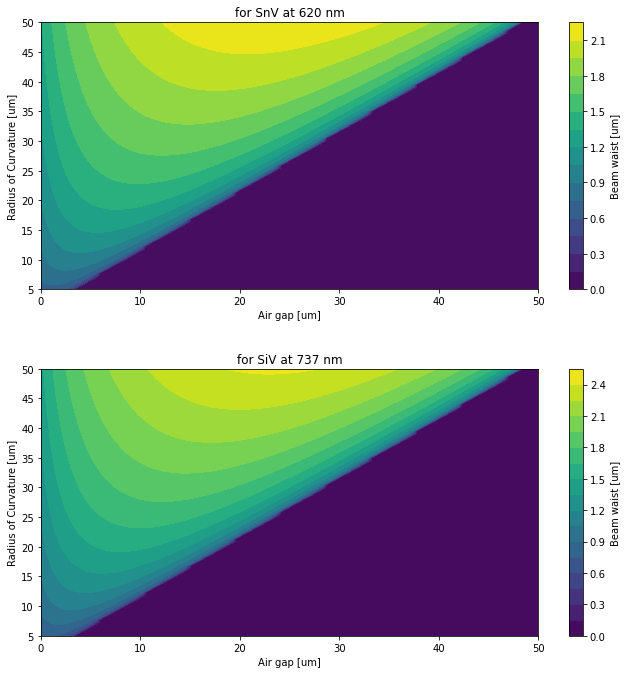

In [225]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import ticker, cm
from scipy import constants 

N = 100
roc_min = 5 
roc_max = 25 
roc = np.linspace(5, 50, N)
t_a = np.linspace(0,50, N)
t_d = 4 
n_d = 2.4 
lam_si = 0.737  
lam_sn = 0.620  


T_a, ROC = np.meshgrid(t_a, roc)

#W = w0_sqrt(ROC,T_a,t_d/n_d)
T_aw = np.where(ROC-(T_a+t_d/n_d)> 0, T_a, -t_d/n_d)

W = ((T_aw+t_d/n_d)*(ROC-(T_aw+t_d/n_d)))**(1/4)
W_si = np.sqrt(lam_si/constants.pi)*W
W_sn = np.sqrt(lam_sn/constants.pi)*W

fig, ax = plt.subplots(2,1)
fig.tight_layout()
fig.set_figheight(10)
fig.set_figwidth(10)
cs1 = ax[0].contourf(T_a, ROC, W_sn,20)
ax[0].set_xlabel('Air gap [um]')
ax[0].set_ylabel('Radius of Curvature [um]')
ax[0].set_title('for SnV at 620 nm')
cbar1 = fig.colorbar(cs1, ax=ax[0])
cbar1.ax.set_ylabel('Beam waist [um]')

#cbar = fig.colorbar(cs)


cs2 = ax[1].contourf(T_a, ROC, W_si,20) 
ax[1].set_xlabel('Air gap [um]')
ax[1].set_ylabel('Radius of Curvature [um]')
ax[1].set_title('for SiV at 737 nm')
cbar2 = fig.colorbar(cs2, ax=ax[1])
cbar2.ax.set_ylabel('Beam waist [um]')

plt.show()


 # The resulting cooperativity $C$ is 

<ipython-input-234-b7b3289c99d8>:4: RuntimeWarning: divide by zero encountered in true_divide
  C_si = 3/(constants.pi**2)*(lam_si/W_si)**2*F_si
<ipython-input-234-b7b3289c99d8>:5: RuntimeWarning: divide by zero encountered in true_divide
  C_sn = 3/(constants.pi**2)*(lam_sn/W_sn)**2*F_sn


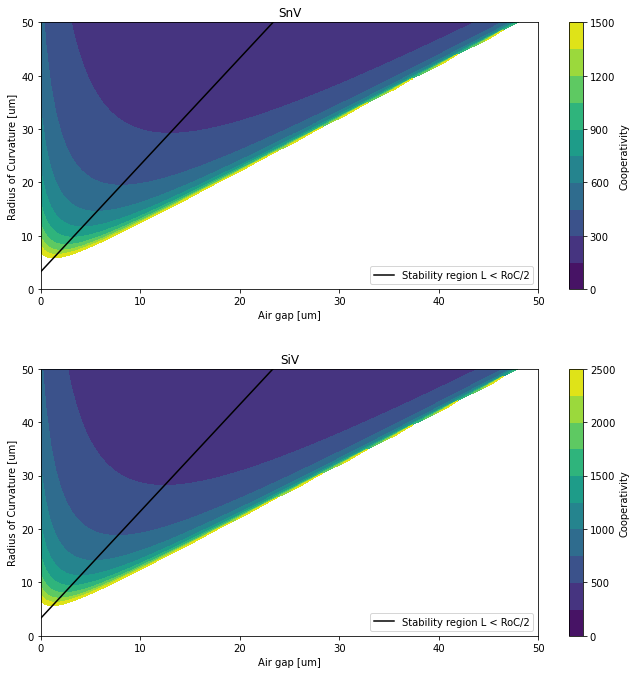

In [234]:
F_si = 10000
F_sn = 7400

C_si = 3/(constants.pi**2)*(lam_si/W_si)**2*F_si
C_sn = 3/(constants.pi**2)*(lam_sn/W_sn)**2*F_sn

fig, ax = plt.subplots(2,1)
fig.tight_layout()
fig.set_figheight(10)
fig.set_figwidth(10)
cs1 = ax[0].contourf(T_a, ROC, C_sn,levels = np.linspace(0, 1500, 10+1))
ax[0].set_xlabel('Air gap [um]')
ax[0].set_ylabel('Radius of Curvature [um]')
ax[0].set_xlim([0, 50])
ax[0].set_ylim([0, 50])
ax[0].set_title('SnV')
ax[0].plot(t_a,2*(t_a+t_d/n_d),color='black',label='Stability region L < RoC/2')
ax[0].legend(loc='lower right')
cbar1 = fig.colorbar(cs1, ax=ax[0])
cbar1.ax.set_ylabel('Cooperativity')


cs2 = ax[1].contourf(T_a, ROC, C_si, levels = np.linspace(0, 2500, 10+1)) 
ax[1].set_xlabel('Air gap [um]')
ax[1].set_ylabel('Radius of Curvature [um]')
ax[1].set_xlim([0, 50])
ax[1].set_ylim([0, 50])
ax[1].set_title('SiV')
ax[1].plot(t_a,2*(t_a+t_d/n_d),color='black',label='Stability region L < RoC/2')
ax[1].legend(loc='lower right')
cbar2 = fig.colorbar(cs2, ax=ax[1])
cbar2.ax.set_ylabel('Cooperativity')

plt.show()

 # Realistic cooperativity $C$ 

The cooperativity is decreased strongly because colour centres are not perfect optical emiters, 
yielding a quenching factor of $C = C_\text{geom} \cdot \xi \cdot \text(QE) \cdot \frac{\gamma_\text{0}}{\gamma_\text{broad}}\cdot$ with the quantum efficiency QE (0.8 for SnV, 0.1 for SiV), the Debye-Waller factor $\xi$ (0.57 for SnV, 0.7 for SiV) and linewidth broadening due to spectral diffusion $\frac{\gamma_\text{0}}{\gamma_\text{broad}}$ (assume linewidth 3 times broader than lifetime limit) (ChildressOSATalk, Sipahigil2016). The spatial straddle of colour centres is ignored, i.e. assuming that a centre at perfect depth can be found by spatially tuning the cavity. Further, the mismatch in dipole axis and growth direction is disregarded because it is different for spin-flipping vs spin-conserving transitions and right now we haven't decided which transitions to use. 



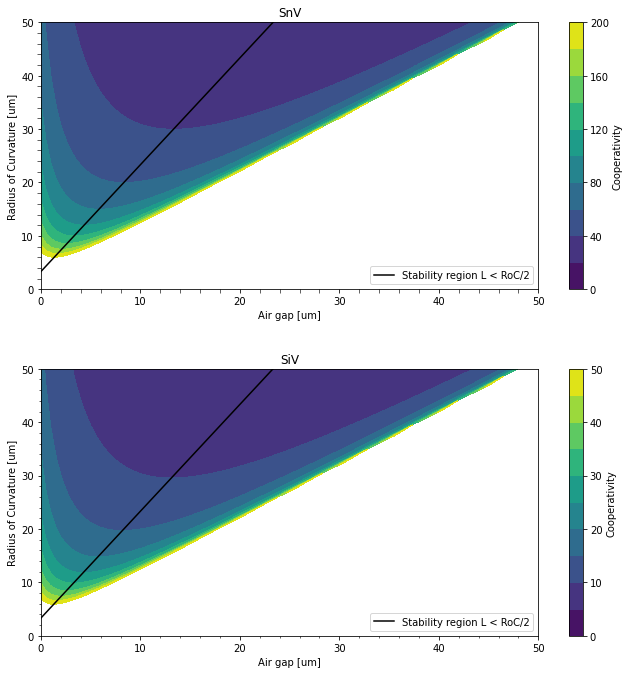

In [246]:
C_sn_r = 0.57*0.8*0.3*C_sn
C_si_r = 0.7*0.1*0.3*C_si


fig, ax = plt.subplots(2,1)
fig.tight_layout()
fig.set_figheight(10)
fig.set_figwidth(10)
cs1 = ax[0].contourf(T_a, ROC, C_sn_r,levels = np.linspace(0, 200, 10+1))
ax[0].set_xlabel('Air gap [um]')
ax[0].set_ylabel('Radius of Curvature [um]')
ax[0].set_xlim([0, 50])
ax[0].set_ylim([0, 50])
ax[0].set_title('SnV')
ax[0].tick_params(which='minor', length=4)
ax[0].xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax[0].yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax[0].plot(t_a,2*(t_a+t_d/n_d),color='black',label='Stability region L < RoC/2')
ax[0].legend(loc='lower right')
cbar1 = fig.colorbar(cs1, ax=ax[0])
cbar1.ax.set_ylabel('Cooperativity')


cs2 = ax[1].contourf(T_a, ROC, C_si_r, levels = np.linspace(0, 50, 10+1)) 
ax[1].set_xlabel('Air gap [um]')
ax[1].set_ylabel('Radius of Curvature [um]')
ax[1].set_xlim([0, 50])
ax[1].set_ylim([0, 50])
ax[1].set_title('SiV')
ax[1].xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax[1].yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax[1].plot(t_a,2*(t_a+t_d/n_d),color='black',label='Stability region L < RoC/2')
ax[1].legend(loc='lower right')
cbar2 = fig.colorbar(cs2, ax=ax[1])
cbar2.ax.set_ylabel('Cooperativity')

plt.show()